PA2 Notebook 2b: Aggregate by Geography
===

This is notebook 2b for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads Pollution Assessment results calculated for every NHDplus catchment (COMID) in Notebook 2, and aggregrates results over various geographies using:
- Aggreation Method 2: Attenuated reach loads accumulated through the stream network

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd
import pyarrow as pa

# import hvplot.pandas
import holoviews as hv
import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
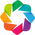

In [2]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [4]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'

In [5]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Test plotting

In [6]:
# create sample data
data = np.random.normal(size=[50, 2])
df = pd.DataFrame(data, columns=['col1', 'col2'])

# create holoviews graph
hv_plot = hv.Points(df)
hv_plot

:Points   [col1,col2]

# Import Data

## Open Files for Geographies

In [7]:
%%time
# read geometry data from GeoParquet files
# huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')

# new inlet data
huc12_in_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_in_outlets_drwi_gdf.parquet')

CPU times: user 284 ms, sys: 60.6 ms, total: 344 ms
Wall time: 354 ms


### Test saving with 'from_HUCs' edits

In [8]:
# This works at first, but fails later because of some change to `from_huc12s`
huc12_in_outlets_drwi_gdf.to_parquet(
    data_output_path /'test.parquet',
    engine='pyarrow',
    compression='brotli',
)

In [9]:
huc12_in_outlets_drwi_gdf.from_huc12s

huc12
020401010101              None
020401010102    [020401010101]
020401010103    [020401010102]
020401010104    [020401010103]
020401010105              None
                     ...      
020403020403    [020403020401]
020403020404              None
020403020405              None
020403020406              None
020403020407              None
Name: from_huc12s, Length: 481, dtype: object

In [10]:
huc12_in_outlets_drwi_gdf.from_huc12s['020401010102']

array(['020401010101'], dtype=object)

In [11]:
# Make a copy of original, for later use.
huc12_in_outlets_drwi_gdf.insert(8, 'from_huc12s_original', huc12_in_outlets_drwi_gdf.from_huc12s)

In [12]:
huc12_in_outlets_drwi_gdf.info()
huc12_in_outlets_drwi_gdf.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            481 non-null    category
 1   geometry              481 non-null    geometry
 2   centroid_xy           481 non-null    object  
 3   comid                 481 non-null    Int64   
 4   nord                  481 non-null    Int64   
 5   to_huc12              481 non-null    category
 6   outlet_comid          481 non-null    Int64   
 7   from_huc12s           231 non-null    object  
 8   from_huc12s_original  231 non-null    object  
 9   inlet_comids          231 non-null    object  
 10  outlet_comids         481 non-null    object  
 11  huc10                 481 non-null    category
 12  huc08                 481 non-null    category
 13  in_drb                481 non-null    boolean 
dtypes: Int64(3), boolean(1),

,huc12_name,geometry,centroid_xy,comid,nord,to_huc12,outlet_comid,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids,huc10,huc08,in_drb
huc12,,,,,,,,,,,,,,
020401010101,Town Brook-Headwaters West Brach Delaware River,"POLYGON ((-8303725.462 5224646.990, -8303761.0...","[-74.62155936289159, 42.387091234041016]",2612792,74293,020401010102,2612792,None,None,None,[2612792],0204010101,02040101,True
020401010102,Betty Brook-Headwaters West Brach Delaware River,"POLYGON ((-8315136.657 5225191.846, -8315097.2...","[-74.71393635968639, 42.38194565669812]",2612800,74290,020401010103,2612800,[020401010101],[020401010101],[2612792],"[2612800, 2612922]",0204010101,02040101,True
020401010103,Rose Brook-Headwaters West Brach Delaware River,"POLYGON ((-8323990.577 5217953.339, -8323948.6...","[-74.71097819143394, 42.330665690562654]",2612808,74288,020401010104,2612808,[020401010102],[020401010102],[2612800],[2612808],0204010101,02040101,True
020401010104,Elk Creek-Headwaters West Brach Delaware River,"POLYGON ((-8326727.279 5222215.417, -8326605.6...","[-74.82334627464569, 42.34506256688788]",2612820,74282,020401010106,2612820,[020401010103],[020401010103],[2612808],[2612820],0204010101,02040101,True
020401010105,Upper Little Delaware River,"POLYGON ((-8319654.283 5208307.086, -8319607.8...","[-74.78436638151948, 42.27096486797448]",2612842,74311,020401010106,2612842,None,None,None,[2612842],0204010101,02040101,True


## Open Files from Notebook 2

In [13]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
# catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

# Aggregation by HUC, using Method 1 (Sum of Local Loads) similar to PA1
huc12_load_gdf = gpd.read_parquet(data_output_path /'huc12_load_gdf.parquet')
huc10_load_gdf = gpd.read_parquet(data_output_path /'huc10_load_gdf.parquet')
huc08_load_gdf = gpd.read_parquet(data_output_path /'huc08_load_gdf.parquet')

# Explore HUC12 Outlets; Confirm & Correct Problems

## Create Functions to explore & correct outlets

In [14]:
# Create convenience functions
def huc12_outlet_info(huc12s: list) -> pd.DataFrame:
    columns = ['huc12_name', 'comid','outlet_comid', 'to_huc12', 'from_huc12s', 'from_huc12s_original', 'inlet_comids', 'outlet_comids']
    problem_huc = huc12_in_outlets_drwi_gdf.loc[huc12s, columns]
    return problem_huc

def huc12_explore_comids(huc12: str) -> pd.DataFrame:
    columns = ['huc12','nord', 'nordstop','maflowv','tp_conc']
    explore_outlets = reach_concs_gdf.loc[reach_concs_gdf.huc12==huc12, columns]
    explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600 
    explore_outlets['nord_diff'] = explore_outlets.nordstop - explore_outlets.nord
    return explore_outlets

def huc12_reassign_outlet(huc12: str, new_outlet_comid: int) -> None:
    """Presently reassigns both `comid` and `outlet_comid`, but the later 
    should eventually be turned into a list
    """
    old_outlet_comid = huc12_in_outlets_drwi_gdf.comid[huc12]
    huc12_in_outlets_drwi_gdf.loc[huc12, 'comid'] = new_outlet_comid
    huc12_in_outlets_drwi_gdf.loc[huc12, 'outlet_comid'] = new_outlet_comid
    print(f'`outlet_comid` changed from {old_outlet_comid} to {huc12_in_outlets_drwi_gdf.comid[huc12]}')
    return None

# This function below breaks the ability to write this field to a Parquet file
def huc12_reassign_from_huc12s(huc12: str, new_from_huc12s: list, debug=False) -> None:
    """Reassigns `from_huc12s` list."""
    new_from_huc12s_array = np.array(pd.array(new_from_huc12s))
    if debug: print(type(new_from_huc12s_array))
    old_from_huc12s = huc12_in_outlets_drwi_gdf.from_huc12s[huc12]
    if debug: print(type(old_from_huc12s))
    huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s'] = new_from_huc12s_array
    print(f'`from_huc12s` changed from {old_from_huc12s} to {huc12_in_outlets_drwi_gdf.from_huc12s[huc12]}')
    return None


## Correct Outlet Errors

NOTE: This was initially done manually as most of the work below, but since Nov 14, 2023 we created a `outlet_comids` field to recognize the reality of multiple outlets, which were created in `geography/huc12_reach_analysis.ipynb`.

In [15]:
# Value counts for HUC12s with multiple outlet COMIDs
huc12_in_outlets_drwi_gdf.outlet_comids.apply(len).value_counts()

outlet_comids
1     364
2      81
3      17
4       6
5       3
7       2
9       2
6       2
24      1
17      1
13      1
0       1
Name: count, dtype: int64

#### Factory Creek-Delaware River

In [16]:
# HUC12 with potential issues
problem_huc12 = '020401010403'
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401010403,Factory Creek-Delaware River,2617370,2617370,020401010406,"[020401010307, 020401010402, 020401020507]","[020401010307, 020401010402, 020401020507]","[2617290, 2616778, 1752159]","[2617370, 2617366]"


In [17]:
# The outlet should have the lowest `nord` AND the highest `maflowv`
# Which is usually also the comid with the largest difference between the nord and nordstop
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head()

,huc12,nord,nordstop,maflowv,tp_conc,tp_load,nord_diff
comid,,,,,,,
2617370,020401010403,73807,73898,112.551,0.033094,3328.527102,91
2617366,020401010403,73899,74971,2157.252,0.015936,30720.442370,1072
2617246,020401010403,73901,73908,8.064,0.031441,226.562841,7
2617382,020401010403,73902,73908,6.772,0.034519,208.891393,6
2616728,020401010403,73903,73908,5.964,0.036863,196.460234,5


In [18]:
huc12_reassign_outlet(problem_huc12, 2617366)

`outlet_comid` changed from 2617370 to 2617366


In [19]:
# Confirm that problem ID has been changed. Should be 2617366
problem_huc12 = '020401010403'
columns = ['huc12_name', 'comid','outlet_comid', 'outlet_comids']
huc12_in_outlets_drwi_gdf.loc[problem_huc12, columns]

huc12_name       Factory Creek-Delaware River
comid                                 2617366
outlet_comid                          2617366
outlet_comids              [2617370, 2617366]
Name: 020401010403, dtype: object

#### Mingo Creek-Schuylkill River

In [20]:
problem_huc12 = '020402031006' # Mingo Creek-Schuylkill River
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402031006,Mingo Creek-Schuylkill River,4782489,4782489,020402031007,"[020402030702, 020402030809, 020402031002, 020...","[020402030702, 020402030809, 020402031002, 020...","[4781691, 4782543, 4782471, 4781739, 4782565, ...","[4782489, 4782491]"


In [21]:
# The outlet should have the lowest `nord` AND the highest `maflowv`
# Which is usually also the comid with the largest difference between the nord and nordstop
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head()

,huc12,nord,nordstop,maflowv,tp_conc,tp_load,nord_diff
comid,,,,,,,
4782489,020402031006,65580,65593,31.715,0.101564,2878.423913,13
4782491,020402031006,65594,67354,2948.422,0.072372,190682.332561,1760
4782493,020402031006,65595,65599,7.168,0.103776,664.725424,4
4781863,020402031006,65596,65599,7.157,0.103978,664.996838,3
4781881,020402031006,65597,65598,1.073,0.070914,67.995141,1


In [22]:
huc12_reassign_outlet(problem_huc12, 4782491)

`outlet_comid` changed from 4782489 to 4782491


#### Baxter Brook-East Branch Delaware River
NEED TO ADDRESS ELSEWHERE

In [23]:
problem_huc12 = '020401020503'  # Baxter Brook-East Branch Delaware River, where 020401020204 Lower Beaver Kill" really joins after outlet
# remove it from `from_huc12s`
huc12_outlet_info([problem_huc12,'020401020204', '020401020502'])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401020503,Baxter Brook-East Branch Delaware River,1752109,1752109,020401020505,"[020401020204, 020401020502]","[020401020204, 020401020502]","[1752843, 1749245]",[1752109]
020401020204,Lower Beaver Kill,1752843,1752843,020401020503,"[020401020202, 020401020203]","[020401020202, 020401020203]","[1750423, 1752035]",[1752843]
020401020502,Trout Brook-East Branch Delaware River,1749245,1749245,020401020503,"[020401020405, 020401020501]","[020401020405, 020401020501]","[1748773, 1748603]","[1749245, 1749243]"


In [24]:
huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s']

array(['020401020204', '020401020502'], dtype=object)

In [25]:
# New `from_huc12s` list, dropping 020401020204
huc12_reassign_from_huc12s(problem_huc12, ['020401020502'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020401020204' '020401020502'] to 020401020502


In [26]:
huc12_in_outlets_drwi_gdf.at[problem_huc12, 'from_huc12s']

array('020401020502', dtype=object)

#### Beers Brook-Middle West Branch Delaware River

In [27]:
problem_huc12 = '020401010205' # Beers Brook-Middle West Branch Delaware River
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401010205,Beers Brook-Middle West Branch Delaware River,2614074,2614074,020401010207,[020401010204],[020401010204],[2613528],"[2614074, 2614072]"


In [28]:
huc12_reassign_outlet(problem_huc12, 2614072)

`outlet_comid` changed from 2614074 to 2614072


#### Lower Pepacton Reservoir
has too much flow coming from 020401020403 Upper Pepacton Reservoir

NEED TO ADDRESS ELSEWHERE

In [29]:
problem_huc12 = '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
# remove it from `from_huc12s`
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401020405,Lower Pepacton Reservoir,1748773,1748773,020401020502,"[020401020403, 020401020404]","[020401020403, 020401020404]","[1748759, 1748767]",[1748773]


In [30]:
# Outlets flows and loads
comids = huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

,huc12,nord,nordstop,maflowv,tp_conc,tp_load
comid,,,,,,
1748773,020401020405,74873,74940,176.197,0.086662,13645.132081


In [31]:
# Inlet flows and loads
comids = huc12_outlet_info([problem_huc12]).inlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

,huc12,nord,nordstop,maflowv,tp_conc,tp_load
comid,,,,,,
1748759,020401020403,74881,74923,530.907,0.023328,11067.578031
1748767,020401020404,74933,74940,63.414,0.031436,1781.391309


In [32]:
# New `from_huc12s` list, dropping 020401020403
huc12_reassign_from_huc12s(problem_huc12, [ '020401020404'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020401020403' '020401020404'] to 020401020404


#### Drawyer Creek-Appoquinimink River
An example of multiple outlets to Delaware River Mainstem

In [33]:
problem_huc12 = '020402050802'	# Drawyer Creek-Appoquinimink River	
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402050802,Drawyer Creek-Appoquinimink River,24902810,24902810,020402040000,None,None,None,"[24902810, 24902842, 4653798, 4653372]"


In [34]:
huc12_explore_comids(problem_huc12).sort_values(by=['nord']).head(15)

,huc12,nord,nordstop,maflowv,tp_conc,tp_load,nord_diff
comid,,,,,,,
24902810,020402050802,77094,77103,2.274,0.014579,29.624540,9
4653296,020402050802,77095,77103,0.508,0.036223,16.443439,8
4653298,020402050802,77096,77102,0.426,0.052472,19.975091,6
4653294,020402050802,77097,77099,0.244,0.082167,17.915780,2
4653302,020402050802,77098,77098,0.003,0.014725,0.039475,0
4653304,020402050802,77099,77099,0.229,0.100167,20.497784,0
4653292,020402050802,77100,77102,0.168,0.047151,7.078682,2
4653290,020402050802,77101,77101,0.004,0.014488,0.051788,0
4653288,020402050802,77102,77102,0.031,0.014198,0.393307,0


In [35]:
# Use new multi-outlet `outlet_comids` field
huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]

array([24902810, 24902842,  4653798,  4653372])

In [36]:
# This demonstrates that outlets are not always unique nor the largest
comids = huc12_outlet_info([problem_huc12]).outlet_comids.at[problem_huc12]
explore_outlets = reach_concs_gdf.loc[comids,['huc12', 'nord', 'nordstop', 'maflowv','tp_conc']]
explore_outlets['tp_load'] = (explore_outlets.tp_conc * 28.3168 / 1000000) * explore_outlets.maflowv * 31557600
explore_outlets

,huc12,nord,nordstop,maflowv,tp_conc,tp_load
comid,,,,,,
24902810,020402050802,77094,77103,2.274,0.014579,29.624540
24902842,020402050802,77105,77205,51.710,0.004505,208.159745
4653798,020402050802,77206,77220,0.753,NaN,NaN
4653372,020402050802,77224,77226,0.222,NaN,NaN


In [37]:
# confirm sum over NaN
explore_outlets.tp_load.sum()

237.7842845314774

### Lower West Branch Brandywine Creek
    '020402050205', # Lower West Branch Brandywine Creek. Remove this inlet: 020402050105 Lower East Branch Brandywine Creek

In [38]:
problem_huc12 = '020402050205' # Lower West Branch Brandywine Creek. 
    # Remove this inlet: 020402050105 Lower East Branch Brandywine Creek from `from_huc12s`
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402050205,Lower West Branch Brandywine Creek,4651852,4651852,020402050401,"[020402050105, 020402050202, 020402050204]","[020402050105, 020402050202, 020402050204]","[4650714, 4650660, 4650716]",[4651852]


In [39]:
# New `from_huc12s` list, dropping 020402050105
huc12_reassign_from_huc12s(problem_huc12, ['020402050202', '020402050204'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020402050105' '020402050202' '020402050204'] to ['020402050202' '020402050204']


### Upper Brandywine Creek
    '020402050401', # Upper Brandywine Creek. Add this inlet: 020402050105 Lower East Branch Brandywine Creek

In [40]:
problem_huc12 = '020402050401' # Upper Brandywine Creek. 
    # Add this inlet: 020402050105 Lower East Branch Brandywine Creek from `from_huc12s`
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402050401,Upper Brandywine Creek,4650888,4650888,020402050402,[020402050205],[020402050205],[4651852],"[4650888, 4652044]"


In [41]:
# New `from_huc12s` list, Add this inlet: 020402050105 Lower East Branch Brandywine Creek from `from_huc12s`
huc12_reassign_from_huc12s(problem_huc12, [ '020402050205', '020402050105'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020402050205'] to ['020402050205' '020402050105']


In [42]:
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402050401,Upper Brandywine Creek,4650888,4650888,020402050402,"[020402050205, 020402050105]",[020402050205],[4651852],"[4650888, 4652044]"


### Lower Maiden Creek & Upper Maiden Creek
- '020402030307', # Lower Maiden Creek, add 020402030304 Sacony Creek and remove from '020402030307' Lower Maiden Creek
- '020402030305', # Upper Maiden Creek, remove 020402030304 Sacony Creek and add to '020402030307' Lower Maiden Creek

In [43]:
problem_huc12 = '020402030307' # Lower Maiden Creek, add 020402030304 Sacony Creek
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402030307,Lower Maiden Creek,4782267,4782267,020402030603,"[020402030305, 020402030306]","[020402030305, 020402030306]","[4779045, 4780613]",[4782267]


In [44]:
huc12_reassign_from_huc12s(problem_huc12, ['020402030305', '020402030306', '020402030304'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020402030305' '020402030306'] to ['020402030305' '020402030306' '020402030304']


In [45]:
problem_huc12 = '020402030305' # Upper Maiden Creek, remove 020402030304 Sacony Creek
huc12_outlet_info([problem_huc12])

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020402030305,Upper Maiden Creek,4779045,4779045,020402030307,"[020402030301, 020402030302, 020402030304]","[020402030301, 020402030302, 020402030304]","[4778921, 4778953, 4779047]",[4779045]


In [46]:
huc12_reassign_from_huc12s(problem_huc12, ['020402030301', '020402030302'], debug=True)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
`from_huc12s` changed from ['020402030301' '020402030302' '020402030304'] to ['020402030301' '020402030302']


### Test saving `from_huc12s`
Will continue anyways and delete edited column before saving

In [47]:
# # This works at first, but fails later because of some change to `from_huc12s`
# huc12_in_outlets_drwi_gdf.to_parquet(
#     data_output_path /'test.parquet',
#     engine='pyarrow',
#     compression='brotli',
# )

# Method 2: Aggregate Attenuated reach loads accumulated through the stream network

Back-calculate cumulative attenuated stream reach loads (kg/y) from excess & remaining average annual concentrations (mg/L) and mean annual flow (CFS)), using:

```
tp_load_atten = (tp_conc * 28.3168 / 1000000) * (maflowv * 31557600)
```

Where:  
- 28.3168 liters in a cubic foot
- 1000000 mg in a kg
- 31557600 = 365.25 * 24 * 60 * 60 seconds per year

## HUC12 Attenuated Outlet Loads
This method requires aggregating over hydrologically defined geographies, such as HUCs. We've decided to do this analysis by HUC12.

In [48]:
suffixes_to_net = ['', '_ps', '_xsnps', '_red1', '_red2', '_red3', '_rem1', '_rem2', '_rem3']

### Get Concentrations at HUC12 outlets

In [49]:
# Old way, considering only one outlet
# Select results at HUC12 outlets, and change index to HUC12

# reach_concs_huc12_gdf = reach_concs_gdf.loc[
#     huc12_in_outlets_drwi_gdf.comid.dropna()
# ]
# reach_concs_huc12_gdf.reset_index(inplace=True)
# reach_concs_huc12_gdf.set_index('huc12', inplace=True)

# Remove COMID geometries

# reach_concs_huc12_gdf.drop('geometry', axis='columns', inplace=True)

In [50]:
# New way, considering multiple outlets
# First, get single list of COMIDs that are HUC12 outlets
huc12_outlets_combined = np.concatenate(huc12_in_outlets_drwi_gdf.outlet_comids.values)
huc12_outlets_combined[:20]


array([2612792, 2612800, 2612922, 2612808, 2612820, 2612842, 2612826,
       2612944, 2613460, 2613464, 2613462, 2613498, 2613528, 2614074,
       2614072, 2614122, 2614138, 2613804, 2613828, 2613826])

In [51]:
# Confirm no duplicates
huc12_outlets_combined.size == np.unique(huc12_outlets_combined).size

True

In [52]:
# Second, select reach concentrations at outlets
reach_concs_huc12_outlets_gdf = reach_concs_gdf.loc[
    huc12_outlets_combined
].copy(deep=True)

### Back-Calculate Attenuated Loads at Outlets

Using Method 2 equation in header above.

In [53]:
['', '_ps', '_xsnps', '_red1', '_red2', '_red3', '_rem1', '_rem2', '_rem3']

['', '_ps', '_xsnps', '_red1', '_red2', '_red3', '_rem1', '_rem2', '_rem3']

In [54]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in suffixes_to_net:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_concs_huc12_outlets_gdf[f'{pollutant}_load{suffix}'] = (
            (reach_concs_huc12_outlets_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * reach_concs_huc12_outlets_gdf.maflowv * 31557600
        )

In [55]:
pa.calc.run_groups

{0: 'No restoration or protection',
 1: 'Direct WPF Restoration',
 2: 'Direct and Indirect WPF Restoration',
 3: 'All Restoration',
 4: 'Direct WPF Protection'}

In [56]:
# Calc and add load reductions
for run_group in [1,2,3]:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_concs_huc12_outlets_gdf[f'{pollutant}_load_red{run_group}'] = (
            reach_concs_huc12_outlets_gdf[f'{pollutant}_load_xsnps'] 
            - reach_concs_huc12_outlets_gdf[f'{pollutant}_load_rem{run_group}']
        )

In [57]:
reach_concs_huc12_outlets_gdf.info()
reach_concs_huc12_outlets_gdf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 714 entries, 2612792 to 26814135
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   catchment_hectares  714 non-null    float64 
 1   watershed_hectares  714 non-null    float64 
 2   maflowv             714 non-null    float64 
 3   geometry            714 non-null    geometry
 4   cluster             596 non-null    category
 5   sub_focusarea       16 non-null     Int64   
 6   nord                714 non-null    Int64   
 7   nordstop            714 non-null    Int64   
 8   huc12               714 non-null    category
 9   streamorder         714 non-null    int64   
 10  headwater           714 non-null    int64   
 11  phase               103 non-null    category
 12  fa_name             103 non-null    category
 13  in_drb              714 non-null    boolean 
 14  huc08               714 non-null    category
 15  huc10               714 no

Index(['catchment_hectares', 'watershed_hectares', 'maflowv', 'geometry',
       'cluster', 'sub_focusarea', 'nord', 'nordstop', 'huc12', 'streamorder',
       'headwater', 'phase', 'fa_name', 'in_drb', 'huc08', 'huc10', 'into_dr',
       'tocomid', 'from_comids', 'ftype', 'gnis_name', 'gnis_id', 'streamleve',
       'streamorde', 'Source', 'Sediment', 'TotalN', 'TotalP', 'run_group',
       'run_type', 'funding_sources', 'with_attenuation', 'tn_conc', 'tp_conc',
       'tss_conc', 'tn_conc_xs', 'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps',
       'tp_conc_ps', 'tss_conc_ps', 'tn_conc_xsnps', 'tp_conc_xsnps',
       'tss_conc_xsnps', 'tn_conc_red1', 'tp_conc_red1', 'tss_conc_red1',
       'tn_conc_red2', 'tp_conc_red2', 'tss_conc_red2', 'tn_conc_red3',
       'tp_conc_red3', 'tss_conc_red3', 'tn_conc_rem1', 'tp_conc_rem1',
       'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2', 'tss_conc_rem2',
       'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3', 'tn_conc_avoid',
       'tp_conc_avoid'

### Sum HUC12 Outlet loads

In [58]:
# Sum over all outlet loads
# First list columns that shouldn't be summed
columns_to_drop = ['watershed_hectares', 'geometry', 
    'cluster', 'sub_focusarea', 'nord', 'nordstop', 'streamorder', 'headwater', 'phase', 'fa_name',
    'in_drb', 'huc08', 'huc10', 'into_dr', 
    'tocomid', 'from_comids', 'ftype', 'gnis_name', 'gnis_id', 'streamleve',
    'streamorde',
    'Source', 'Sediment', 'TotalN',
    'TotalP', 'run_group', 'run_type', 'funding_sources',
    'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
    'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
    'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 
    'tn_conc_red1', 'tp_conc_red1', 'tss_conc_red1',
    'tn_conc_red2', 'tp_conc_red2', 'tss_conc_red2', 'tn_conc_red3',
    'tp_conc_red3', 'tss_conc_red3', 'tn_conc_rem1', 'tp_conc_rem1',
    'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2', 'tss_conc_rem2',
    'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
    'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid',
]
# Convert from GDF to DF, by dropping geometry (and othe non-summable columns)
temp_df = reach_concs_huc12_outlets_gdf.drop(columns_to_drop, axis=1)

In [59]:
temp_sum_df = temp_df.groupby(by='huc12', observed=False).sum()
temp_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 484 entries, 020401010101 to 020403030101
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   catchment_hectares  484 non-null    float64
 1   maflowv             484 non-null    float64
 2   tn_load             484 non-null    float64
 3   tp_load             484 non-null    float64
 4   tss_load            484 non-null    float64
 5   tn_load_ps          484 non-null    float64
 6   tp_load_ps          484 non-null    float64
 7   tss_load_ps         484 non-null    float64
 8   tn_load_xsnps       484 non-null    float64
 9   tp_load_xsnps       484 non-null    float64
 10  tss_load_xsnps      484 non-null    float64
 11  tn_load_red1        484 non-null    float64
 12  tp_load_red1        484 non-null    float64
 13  tss_load_red1       484 non-null    float64
 14  tn_load_red2        484 non-null    float64
 15  tp_load_red2        484 non-nul

### Create HUC12 Outlet Concs GDF

In [60]:
# Create dataframe for HUC12 loads (blank for now)
# by joining HUC12 metadata with summed outlet loads
huc12_outlet_loads_gdf = huc12_in_outlets_drwi_gdf.copy(deep=True).join(temp_sum_df)

In [61]:
# Index resort and reset as Category
huc12_outlet_loads_gdf.sort_index(inplace=True)
huc12_outlet_loads_gdf.index = huc12_outlet_loads_gdf.index.astype(
    pd.CategoricalDtype(ordered=True), copy=True
)

### Calculate net loads

#### Explore how to build functions

In [63]:
# Create small test dataframe
test_gdf = huc12_outlet_loads_gdf[['from_huc12s', 'tp_load_rem3']].head(10)
test_gdf

,from_huc12s,tp_load_rem3
huc12,,
020401010101,None,-2425.331527
020401010102,[020401010101],-4120.605990
020401010103,[020401010102],-6135.844500
020401010104,[020401010103],-8242.231184
020401010105,None,-5253.900561
020401010106,"[020401010104, 020401010105]",-11043.478466
020401010201,[020401010106],-19688.257984
020401010202,[020401010201],-25373.353613
020401010203,None,-2276.591860


In [64]:
# Note that unused categories cause a `KeyError` in the lambda function
test_gdf.index

CategoricalIndex(['020401010101', '020401010102', '020401010103',
                  '020401010104', '020401010105', '020401010106',
                  '020401010201', '020401010202', '020401010203',
                  '020401010204'],
                 categories=['020401010101', '020401010102', '020401010103', '020401010104', ..., '020403020404', '020403020405', '020403020406', '020403020407'], ordered=True, dtype='category', name='huc12')

In [65]:
# Remove unused categories to avoid the `KeyError`
test_gdf.index = test_gdf.index.remove_unused_categories()
# test_gdf.huc12 = test_gdf.huc12.cat.remove_unused_categories() 

In [66]:
# Create test functions
def get_inlet_loads_test(huc12: str) -> list:
    """Fetches list of HUC12s that flow into a HUC12, if any."""
    if type(test_gdf.from_huc12s[huc12]) == np.ndarray:
        ds = test_gdf.tp_load_rem3[test_gdf.from_huc12s[huc12]]
    else:
        ds = []
    return ds

def calc_net_load_test(huc12: str) -> float:
    """Calculates the net load of a HUC12, by subtracting inflow loads from outflow load."""
    net = (test_gdf.tp_load_rem3[huc12]
        - sum(get_inlet_loads_test(huc12))
    )
    return net

In [67]:
# Apply function
test_gdf['tp_load_rem3_net'] = test_gdf.index.to_series().apply(lambda huc12: calc_net_load_test(huc12))
test_gdf

,from_huc12s,tp_load_rem3,tp_load_rem3_net
huc12,,,
020401010101,None,-2425.331527,-2425.331527
020401010102,[020401010101],-4120.605990,-1695.274463
020401010103,[020401010102],-6135.844500,-2015.238510
020401010104,[020401010103],-8242.231184,-2106.386684
020401010105,None,-5253.900561,-5253.900561
020401010106,"[020401010104, 020401010105]",-11043.478466,2452.653278
020401010201,[020401010106],-19688.257984,-8644.779517
020401010202,[020401010201],-25373.353613,-5685.095629
020401010203,None,-2276.591860,-2276.591860


#### Function to find row `from_huc12s` list/array

In [68]:
# Issue where a huc in `from_huc12s` isn't in the index
any(huc12_outlet_loads_gdf.index.isin(['020403010404'])) # Value from early error below

False

In [69]:
huc12 = '020401010106' # two inlets
# huc12 = '020403010405' # problem row, where item in `from_huc12s` isn't in the index
huc12_outlet_loads_gdf.from_huc12s[huc12]

array(['020401010104', '020401010105'], dtype=object)

In [70]:
huc12 = '020401010106' # two inlets
from_huc12 = '020401010104' # in from_huc12 for '020401010106' two inlets

x = huc12_outlet_loads_gdf.from_huc12s[huc12]
np.isin(x, from_huc12)

array([ True, False])

In [71]:
def is_fromhuc_in_fromhucs(from_huc12s: np.ndarray, from_huc12: str) -> bool:
    if type(from_huc12s) == np.ndarray:
        inarray = any(np.isin(from_huc12s,from_huc12))
    else:
        inarray = False
    return inarray

In [72]:
# Test function on a single good value
huc12 = '020401010106' # two inlets
from_huc12 = '020401010104' # in from_huc12 for '020401010106' two inlets

is_fromhuc_in_fromhucs(huc12_outlet_loads_gdf.from_huc12s[huc12], from_huc12 )

True

In [73]:
def are_fromhucs_in_index(from_huc12s: np.ndarray) -> np.ndarray[bool]:
    if type(from_huc12s) == np.ndarray:
        inarray = np.isin(from_huc12s, huc12_outlet_loads_gdf.index)
    else:
        inarray = False
    return inarray

In [74]:
# Test function on a single good value
huc12 = '020401010106' # two inlets
are_fromhucs_in_index(huc12_outlet_loads_gdf.from_huc12s[huc12])

array([ True,  True])

In [75]:
# Apply function to a dataframe to find the problem row
from_huc12 = '020403010404' # Not in index
# fromwhere = huc12_outlet_loads_gdf.from_huc12s.apply(lambda x: is_fromhuc_in_fromhucs(x,from_huc12))
# fromwhere[fromwhere == True]

# this stopped working after I applied my `huc12_reassign_from_huc12s()` to a record

In [76]:
#So this function fails on this row
# get_inlet_loads('tp','_rem3',from_huc12)

In [77]:
# Test function again on a bad value
huc12 = '020403010405' # problem row
are_fromhucs_in_index(huc12_outlet_loads_gdf.from_huc12s[huc12])

array([False])

In [78]:
# This is the problematic row
huc12_outlet_loads_gdf.loc['020403010405'].head(13)

huc12_name                                      Forked River-Barnegat Bay
geometry                POLYGON ((-8246979.924288888 4846943.997902947...
centroid_xy                        [-74.1967227753088, 39.83119001643217]
comid                                                            26812379
nord                                                               121561
to_huc12                                                     020403010407
outlet_comid                                                     26812379
from_huc12s                                                [020403010404]
from_huc12s_original                                       [020403010404]
inlet_comids                                                    [9443475]
outlet_comids           [26812379, 9454971, 9444453, 9444107, 9445131,...
huc10                                                          0204030104
huc08                                                            02040301
Name: 020403010405, dtype: object

In [79]:
# Try droping a single row, to see if that solves the problem
# huc12_outlet_loads_gdf.drop('020403010405', inplace=True)

But that just caused a new error:  
`KeyError: "['020403010405'] not in index"`

In [80]:
# Test approach to not search for problem row
huc12 = '020401010106' # two inlets
df = huc12_outlet_loads_gdf
from_huc12s_array = df.from_huc12s[huc12]
from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
ds = df['tp_load_rem3'][from_huc12s_array[from_huc12s_mask]]
ds

huc12
020401010104   -8242.231184
020401010105   -5253.900561
Name: tp_load_rem3, dtype: float64

In [81]:
from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
from_huc12s_mask

array([ True,  True])

In [82]:
test_mask = [True, False]
test_mask

[True, False]

In [83]:
from_huc12s_array[test_mask]

array(['020401010104'], dtype=object)

#### Functions for net load

In [84]:
def get_inlet_loads(var: str, huc12: str) -> list:
    """Fetches list of HUC12s that flow into a HUC12, if any."""
    df = huc12_outlet_loads_gdf
    if type(df.from_huc12s[huc12]) == np.ndarray:
        from_huc12s_array = df.from_huc12s[huc12]
        from_huc12s_mask = are_fromhucs_in_index(from_huc12s_array)
        ds = df[var][from_huc12s_array[from_huc12s_mask]]
    else:
        ds = []
    return ds

def calc_net_load(var: str, huc12: str) -> float:
    """Calculates the net load of a HUC12, by subtracting inflow loads from outflow load."""
    df = huc12_outlet_loads_gdf
    net = (df[var][huc12]
        - sum(get_inlet_loads(var, huc12))
    )
    return net

In [85]:
suffixes_to_net

['', '_ps', '_xsnps', '_red1', '_red2', '_red3', '_rem1', '_rem2', '_rem3']

In [86]:
# Confirm functions work

# huc12 = '020401010101' # no inlets
# huc12 = '020401010106' # two inlets
huc12 = '020403010405' # problem row

pollutants = ['tn', 'tp', 'tss']

var = f'{pollutants[1]}_load{suffixes_to_net[4]}'
print(var)

get_inlet_loads(var, huc12)

tp_load_red2


Series([], Name: tp_load_red2, dtype: float64)

In [87]:
# Confirm functions work
calc_net_load(var, huc12)

0.0

In [88]:
problem_huc12 = '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
var = 'maflowv'
calc_net_load(var, problem_huc12)

112.783

In [89]:
_.dtype

dtype('float64')

#### Apply functions to add net attenuated loads

In [90]:
# Remove unused categories to avoid the `KeyError`
huc12_outlet_loads_gdf.index = huc12_outlet_loads_gdf.index.remove_unused_categories()
# huc12_outlet_loads_gdf.huc12 = huc12_outlet_loads_gdf.huc12.cat.remove_unused_categories()

In [91]:
df = huc12_outlet_loads_gdf
# Calc net pollution loads
for suffix in suffixes_to_net:
    for pollutant in ['tn', 'tp', 'tss']:
        var = f'{pollutant}_load{suffix}'
        df[f'{var}_net'] = df.index.to_series().apply(
            lambda huc12: calc_net_load(var, huc12)
        )

In [92]:
# Calc net flows
var = 'maflowv'
df[f'{var}_net'] = df.index.to_series().apply(
    lambda huc12: calc_net_load(var, huc12)
)

In [93]:
# This is a category for some reason!
huc12_outlet_loads_gdf.maflowv_net

huc12
020401010101    56.661
020401010102    40.396
020401010103    44.661
020401010104    46.591
020401010105    98.559
                 ...  
020403020403   -29.176
020403020404    21.541
020403020405     7.133
020403020406     7.770
020403020407     7.770
Name: maflowv_net, Length: 481, dtype: category
Categories (481, float64): [56.661 < 40.396 < 44.661 < 46.591 ... 21.541 < 7.133 < 7.770 < 7.770]

In [94]:
# Convert from Category to float
huc12_outlet_loads_gdf.maflowv_net = huc12_outlet_loads_gdf.maflowv_net.astype('float')

## Zero-Out Problem HUC12s

### Zero-out negative net flows
To deal with significant water withdrawls, especially in reservoirs in NY Catskills.
NOTE: This also finds HUC12 with outlet errors that should not be removed from this analysis.

In [95]:
# How many HUC12s have a negative `maflowv_net`, due to water withdrawls
huc12_outlet_loads_gdf.maflowv_net.lt(0).value_counts()


maflowv_net
False    438
True      43
Name: count, dtype: int64

In [96]:
# Proportion negative
# 47/481 prior to `from_HUC12s` fixes
44/481

0.09147609147609148

In [97]:
net_neg_flow_mask = huc12_outlet_loads_gdf.maflowv_net.lt(0)

In [98]:
net_neg_flow_list = net_neg_flow_mask[net_neg_flow_mask==True].index

In [99]:
# List HUC12s with negative flows
huc12_outlet_info(net_neg_flow_list)

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401010106,Wright Brook-Headwaters West Brach Delaware River,2612826,2612826,020401010201,"[020401010104, 020401010105]","[020401010104, 020401010105]","[2612820, 2612842]",[2612826]
020401010204,Mallory Brook-Upper West Branch Delaware River,2613528,2613528,020401010205,"[020401010202, 020401010203]","[020401010202, 020401010203]","[2613460, 2613498]",[2613528]
020401010207,Cannonsville Reservoir,2614138,2614138,020401010304,"[020401010205, 020401010206]","[020401010205, 020401010206]","[2614074, 2614122]",[2614138]
020401010307,Balls Creek-Lower West Branch Delaware River,2617290,2617290,020401010403,"[020401010305, 020401010306]","[020401010305, 020401010306]","[2622198, 2616584]",[2617290]
020401010604,Peggy Run-Delaware River,2617554,2617554,020401010606,"[020401010506, 020401010602, 020401010603]","[020401010506, 020401010602, 020401010603]","[2617486, 2617038, 2617552]",[2617554]
020401020202,Middle Beaver Kill,1750423,1750423,020401020204,"[020401020104, 020401020201]","[020401020104, 020401020201]","[1750427, 1748733]",[1750423]
020401020403,Upper Pepacton Reservoir,1748759,1748759,020401020405,"[020401020306, 020401020401, 020401020402]","[020401020306, 020401020401, 020401020402]","[1748587, 1748611, 1748753]",[1748759]
020401030203,Big Brook-Dyberry Creek,2739540,2739540,020401030601,"[020401030103, 020401030202]","[020401030103, 020401030202]","[2739774, 2739746]",[2739540]
020401040302,East Branch Neversink River,4147394,4147394,020401040303,[020401040301],[020401040301],[4147396],[4147394]


In [100]:
# replace `mainstem_mask` net loads with NaN
for suffix in suffixes_to_net:
    for pollutant in ['tn', 'tp', 'tss']:
        huc12_outlet_loads_gdf.loc[net_neg_flow_mask,f'{pollutant}_load{suffix}_net'] = np.nan

### Zero-out Mainstem net loads, by name
because they have errors due to no concentrations

In [101]:
# Mask by name
mainstem_mask = huc12_outlet_loads_gdf.huc12_name.str.contains(
    '-Delaware River|Delaware Bay', regex=True
 )
mainstem_mask.value_counts()

huc12_name
False    429
True      52
Name: count, dtype: int64

In [102]:
huc12_outlet_loads_gdf[mainstem_mask].huc12_name

huc12
020401010403          Factory Creek-Delaware River
020401010406              Pea Brook-Delaware River
020401010501          Hankins Creek-Delaware River
020401010506        Beaverdam Creek-Delaware River
020401010604              Peggy Run-Delaware River
020401010606       Westcolang Creek-Delaware River
020401030603       Lackawaxen River-Delaware River
020401040504       Twin Lakes Creek-Delaware River
020401040505           Shingle Kill-Delaware River
020401040704          Shimers Brook-Delaware River
020401040705        Hornbecks Creek-Delaware River
020401041005       Vancampens Brook-Delaware River
020401050601        Allegheny Creek-Delaware River
020401050602          Martins Creek-Delaware River
020401050603         Buckhorn Creek-Delaware River
020401050604            Cooks Creek-Delaware River
020401050605        Lopatcong Creek-Delaware River
020401050901       Hakihokake Creek-Delaware River
020401050902    Nishisakawick Creek-Delaware River
020401050903          Tin

In [103]:
# replace `mainstem_mask` net loads with NaN
for suffix in suffixes_to_net:
    for pollutant in ['tn', 'tp', 'tss']:
        huc12_outlet_loads_gdf.loc[mainstem_mask,f'{pollutant}_load{suffix}_net'] = np.nan

In [104]:
huc12_outlet_loads_gdf[mainstem_mask]

,huc12_name,geometry,centroid_xy,comid,nord,to_huc12,outlet_comid,from_huc12s,from_huc12s_original,inlet_comids,...,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net,maflowv_net
huc12,,,,,,,,,,,,,,,,,,,,,
020401010403,Factory Creek-Delaware River,"POLYGON ((-8378221.427 5151841.655, -8378154.7...","[-75.27209008525746, 41.887597916294425]",2617366,73807,020401010406,2617366,"[020401010307, 020401010402, 020401020507]","[020401010307, 020401010402, 020401020507]","[2617290, 2616778, 1752159]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.141
020401010406,Pea Brook-Delaware River,"POLYGON ((-8363935.141 5149815.582, -8363868.4...","[-75.16809024110287, 41.88143428771512]",2617384,73743,020401010501,2617384,"[020401010403, 020401010404, 020401010405]","[020401010403, 020401010404, 020401010405]","[2617370, 2616756, 2616816]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.415
020401010501,Hankins Creek-Delaware River,"POLYGON ((-8347923.900 5144333.514, -8347799.6...","[-75.08286158289661, 41.810742013902946]",2617442,73661,020401010506,2617442,[020401010406],[020401010406],[2617384],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.033
020401010506,Beaverdam Creek-Delaware River,"POLYGON ((-8355618.629 5125857.910, -8355587.8...","[-75.08496108669196, 41.72747404678263]",2617486,73565,020401010604,2617486,"[020401010501, 020401010505]","[020401010501, 020401010505]","[2617442, 2617252]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.137
020401010604,Peggy Run-Delaware River,"POLYGON ((-8346677.744 5118043.931, -8346688.3...","[-75.05089551810381, 41.63528061697637]",2617554,73448,020401010606,2617554,"[020401010506, 020401010602, 020401010603]","[020401010506, 020401010602, 020401010603]","[2617486, 2617038, 2617552]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.728
020401010606,Westcolang Creek-Delaware River,"POLYGON ((-8344238.314 5094753.275, -8344207.4...","[-75.00260610937411, 41.52355405282967]",2619256,73297,020401040504,2619256,"[020401010604, 020401010605]","[020401010604, 020401010605]","[2617554, 2617202]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.264
020401030603,Lackawaxen River-Delaware River,"POLYGON ((-8366042.954 5094946.324, -8365951.2...","[-75.10024782330726, 41.48152054028455]",2741462,72447,020401040504,2741462,"[020401030505, 020401030601, 020401030602]","[020401030505, 020401030601, 020401030602]","[2743218, 2742540, 2742580]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.187
020401040504,Twin Lakes Creek-Delaware River,"POLYGON ((-8340465.281 5088469.213, -8340454.0...","[-74.90365126862747, 41.437395848232526]",4151440,72128,020401040505,4151440,"[020401010606, 020401030603, 020401040403, 020...","[020401010606, 020401030603, 020401040403, 020...","[2619256, 2741462, 4151396, 4149986, 4150028, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.881
020401040505,Shingle Kill-Delaware River,"POLYGON ((-8314264.699 5087170.589, -8314225.2...","[-74.74256786199639, 41.42891982519458]",4158256,71290,020401040704,4158256,"[020401040107, 020401040308, 020401040504]","[020401040107, 020401040308, 020401040504]","[4151446, 4151522, 4151440]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.853


### Zero-out zero outlet loads

In [105]:
# How many HUC12s have a zero outlet loads, due to draining to mainstem
huc12_outlet_loads_gdf.tp_load.le(0).value_counts()

tp_load
False    460
True      21
Name: count, dtype: int64

In [106]:
zero_load_mask = huc12_outlet_loads_gdf.tp_load.le(0)

In [107]:
# List HUC12s with negative loads
zero_load_mask_list = zero_load_mask[zero_load_mask==True].index
huc12_outlet_info(zero_load_mask_list)

,huc12_name,comid,outlet_comid,to_huc12,from_huc12s,from_huc12s_original,inlet_comids,outlet_comids
huc12,,,,,,,,
020401030603,Lackawaxen River-Delaware River,2741462,2741462,020401040504,"[020401030505, 020401030601, 020401030602]","[020401030505, 020401030601, 020401030602]","[2743218, 2742540, 2742580]",[2741462]
020401040106,Black Brook,4147822,4147822,020401040107,None,None,None,[4147822]
020401040704,Shimers Brook-Delaware River,4151706,4151706,020401040705,"[020401040505, 020401040701, 020401040702, 020...","[020401040505, 020401040701, 020401040702, 020...","[4158256, 4150730, 4150820, 4150956]",[4151706]
020401040705,Hornbecks Creek-Delaware River,4151822,4151822,020401041005,"[020401040606, 020401040704]","[020401040606, 020401040704]","[4151824, 4151706]",[4151822]
020401050203,Beaver Brook - 20401050203,2588225,2588225,020401050204,None,None,None,[2588225]
020401050204,Lower Pequest River,2587861,2587861,020401050601,"[020401050202, 020401050203]","[020401050202, 020401050203]","[2586805, 2588225]",[2587861]
020401050601,Allegheny Creek-Delaware River,2588375,2588375,020401050603,"[020401041005, 020401050104, 020401050204]","[020401041005, 020401050104, 020401050204]","[4154510, 2587753, 2587861]",[2588375]
020401050603,Buckhorn Creek-Delaware River,2588457,2588457,020401050605,"[020401050303, 020401050601, 020401050602, 020...","[020401050303, 020401050601, 020401050602, 020...","[2588259, 2588375, 2587977, 4188251]",[2588457]
020401050911,Buck Creek-Delaware River,4481949,4481949,020402010404,"[020401050803, 020401050910]","[020401050803, 020401050910]","[2590137, 2589737]",[4481949]


In [108]:
# replace `zero_load_mask` net loads with NaN
for suffix in suffixes_to_net:
    for pollutant in ['tn', 'tp', 'tss']:
        huc12_outlet_loads_gdf.loc[zero_load_mask,f'{pollutant}_load{suffix}_net'] = np.nan

### Zero-out Manually
These are not covered by any of the above methods.

In [109]:
# Not covered by above methods
problem_huc12s_manual = [
    '020401020405',  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
        # and corrections above do not fully account for how withdrawls affect negative flows
    '020402060604', # Back Creek, on Delaware Bay
    '020402060605', # Dividing Creek-Oranoaken Creek, on Delaware Bay
    '020401050204', # Lower Pequest River, flows into mainstem and has zero outlet load
]

In [110]:
huc12_outlet_loads_gdf.loc[problem_huc12s_manual, :]

,huc12_name,geometry,centroid_xy,comid,nord,to_huc12,outlet_comid,from_huc12s,from_huc12s_original,inlet_comids,...,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net,maflowv_net
huc12,,,,,,,,,,,,,,,,,,,,,
020401020405,Lower Pepacton Reservoir,"POLYGON ((-8340570.793 5177095.221, -8340562.2...","[-74.878837899741, 42.07162316052836]",1748773,74873,020401020502,1748773,020401020404,"[020401020403, 020401020404]","[1748759, 1748767]",...,-300362.445954,2793.176761,-1.364117e+07,-300362.445954,2793.176761,-1.364117e+07,-300362.445954,2793.176761,-1.364117e+07,112.783
020402060604,Back Creek,"POLYGON ((-8376861.027 4775147.368, -8376816.5...","[-75.24124884395003, 39.31331191893464]",24946864,78160,020402040000,24946864,[020402060303],[020402060303],[9486246],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-55.832
020402060605,Dividing Creek-Oranoaken Creek,"POLYGON ((-8353977.618 4767436.951, -8354002.9...","[-75.11145659337949, 39.21451081461224]",9486540,119714,020402040000,9486540,[020402060507],[020402060507],[9486502],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-439.211
020401050204,Lower Pequest River,"POLYGON ((-8330402.176 4996204.063, -8330425.1...","[-74.9596903391762, 40.841311293104276]",2587861,69673,020401050601,2587861,"[020401050202, 020401050203]","[020401050202, 020401050203]","[2586805, 2588225]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.325


In [111]:
# replace `problem_huc12_mainstem` net loads with NaN
for problem_huc12 in problem_huc12s_manual:
    for suffix in suffixes_to_net:
        for pollutant in ['tn', 'tp', 'tss']:
            huc12_outlet_loads_gdf.at[problem_huc12,f'{pollutant}_load{suffix}_net'] = np.nan

# Explore HUC12 Attenuated Loads

In [112]:
# huc08_select = huc12_outlet_loads_gdf.huc08=='02040205' # Brandywine-Christina
# huc12_outlet_loads_gdf.loc[huc08_select].tp_load_net

### Map HUC12 Net Loads

In [113]:
var = 'tp_load_rem3'

def huc12_outlet_loads_plot(var: str):
    # Mask by HUC12s only in_drb
    gdf = huc12_outlet_loads_gdf[huc12_outlet_loads_gdf.in_drb]
    # remove negative values
    gdf = gdf[gdf[var]>0]
    gdf_plot = gdf[[var, gdf.geometry.name]]

    # Prep for plotting
    gdf_plot = pa.dynamic_plot.prep_gdf(gdf_plot)
    # Remove negative & NaN

    huc_plot = gv.Polygons(
        gdf_plot, 
        vdims=[gdf.index.name, var], 
    ).opts(
        height = 600,
        width = 600,
        color = var,
        colorbar = True,
        cmap = 'cet_CET_L18',
        # cnorm = 'log',
        # clim = (kwargs['vmin'], kwargs['vmax']),
        # line_width = kwargs['line_width'],
        title = var,
        tools = ['hover'],
        # to get additioanl fields in hover, see https://stackoverflow.com/questions/72466096/adding-tooltip-to-holoviews-polygons
    )
    return huc_plot

In [114]:
# Plot before subtracting inlets. Skip for shorter run time
var = 'tp_load_rem3'
huc12_outlet_loads_plot(var) * gv.tile_sources.CartoLight()

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (huc12,tp_load_rem3)
   .WMTS.I     :WMTS   [Longitude,Latitude]

In [115]:
var = 'tp_load_rem3_net'
huc12_outlet_loads_plot(var) * gv.tile_sources.CartoLight()

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]   (huc12,tp_load_rem3_net)
   .WMTS.I     :WMTS   [Longitude,Latitude]

### Check HUC12s for wrong outlets
Using functions developed in Explore HUC12 Outlets section, above.
If an error is found, go back to to top to reapply and rerun notebook.

In [116]:
huc12_outlet_loads_gdf.tp_load_rem3_net.gt(0).value_counts()

tp_load_rem3_net
False    385
True      96
Name: count, dtype: int64

In [117]:
# HUC12 with potential issues
problem_huc12s = [
    # '020402031007'
    # '020401010403'  # Factory Creek-Delaware River
    # '020402031006' # Mingo Creek-Schuylkill River
    # '020401020503'  # Baxter Brook-East Branch Delaware River, where "020401020204 Lower Beaver Kill" really joins after outlet
    # '020401010205' # Beers Brook-Middle West Branch Delaware River
    # '020401020405'  # Lower Pepacton Reservoir, has too much flow coming from 020401020403 Upper Pepacton Reservoir
    # '020401040505' # Shingle Kill-Delaware River, zero-out net loads b/c mainstem so has NaN concentrations in major inflows
    # '020401040504' # Twin Lakes Creek-Delaware River, mainstem
    # '020402040000', # Delaware Bay-Deep
    # '020402020507', # Woodbury Creek-Delaware River
    # '020402060605', # Dividing Creek-Oranoaken Creek
    # '020401020202', # Middle Beaver Kill
    # '020401010505', # Lower East Branch Callicoon Creek, not a problem. Actually has developed and ag lands
    # '020402020102', # Mount Misery Brook. Not a problem. Has suburban (and woody wetlands) 
    # '020402050205', # Lower West Branch Brandywine Creek. Remove this inlet: 020402050105 Lower East Branch Brandywine Creek
    # '020402050105', # Lower East Branch Brandywine Creek. 
    # '020402050401', # Upper Brandywine Creek. Add this inlet: 020402050105 Lower East Branch Brandywine Creek
    # '020402030307', # Lower Maiden Creek, add 020402030304 Sacony Creek and remove from '020402030307' Lower Maiden Creek
    # '020402030305', # Upper Maiden Creek, remove 020402030304 Sacony Creek and add to '020402030307' Lower Maiden Creek
    # '020402030403', # Upper Tulpehocken Creek, seems OK and that loads make sense based on landuse.
    # '020401050204', # Lower Pequest River, flows into mainstem
    '020401050402', # Lower Pohatcong Creek, seems OK and that loads make sense based on landuse.
]
huc12s = [*problem_huc12s, '020401050401', '020401050605']
columns = ['huc12_name', 'from_huc12s', 'from_huc12s_original','inlet_comids', 'to_huc12', 'outlet_comids', 'nord', 
    'maflowv', 'maflowv_net', 'tp_load', 'tp_load_net', 'tp_load_xsnps_net', 'tp_load_rem3_net'
]
huc12_outlet_loads_gdf.loc[huc12s, columns]

,huc12_name,from_huc12s,from_huc12s_original,inlet_comids,to_huc12,outlet_comids,nord,maflowv,maflowv_net,tp_load,tp_load_net,tp_load_xsnps_net,tp_load_rem3_net
huc12,,,,,,,,,,,,,
020401050402,Lower Pohatcong Creek,[020401050401],[020401050401],[2588013],020401050605,[2588067],69479,107.347,62.358,14550.066582,10772.941689,5791.205404,5516.288057
020401050401,Upper Pohatcong Creek,None,None,None,020401050402,"[2588013, 2588245]",69494,44.989,44.989,3777.124893,3777.124893,-1429.795639,-1447.108607
020401050605,Lopatcong Creek-Delaware River,"[020401050402, 020401050504, 020401050603, 020...","[020401050402, 020401050504, 020401050603, 020...","[2588067, 2588261, 2588457, 2588095]",020401050904,"[2588483, 2588481]",69309,11794.604,2963.227,4258.612391,NaN,NaN,NaN


In [118]:
# The outlet should have: lowest `nord`; the highest `maflowv`; largest difference between nord and nordstop
explore_huc12 = problem_huc12s[0]
print(huc12_outlet_info([explore_huc12]).huc12_name.values)
huc12_explore_comids(explore_huc12).sort_values(by=['nord'])

['Lower Pohatcong Creek']
Categories (533, object): ['020403030604-Atlantic Ocean', '020403030605-Atlantic Ocean', '020403040403-Atlantic Ocean', '020403040502-Atlantic Ocean', ..., 'Wrangle Brook', 'Wright Brook-Headwaters West Brach Delaware R..., 'Wright Creek-Lehigh River', 'Wyomissing Creek']


,huc12,nord,nordstop,maflowv,tp_conc,tp_load,nord_diff
comid,,,,,,,
2588067,020401050402,69479,69523,107.347,0.151680,14550.066582,44
2588063,020401050402,69480,69480,1.996,0.423370,755.142479,0
2588065,020401050402,69481,69523,96.361,0.138588,11933.677466,42
2588055,020401050402,69482,69489,11.592,0.107357,1112.085151,7
2588037,020401050402,69483,69489,8.919,0.043184,344.185023,6
2588033,020401050402,69484,69484,0.950,0.099810,84.731501,0
2588031,020401050402,69485,69489,7.722,0.034961,241.248772,4
2588441,020401050402,69486,69489,6.212,0.040018,222.142203,3
2588567,020401050402,69487,69489,4.420,0.046202,182.488302,2


### Histograms

In [119]:
var = 'tp_load_rem3_net'
df_plot = huc12_outlet_loads_gdf.loc[:,var]
df_plot.hvplot.hist(ylabel='Number of HUC12s')

:Histogram   [tp_load_rem3_net]   (tp_load_rem3_net_count)

In [120]:
# histogram of log transformed data >0
df_log = np.log(df_plot[df_plot>0]).dropna()
df_log.hvplot.hist(ylabel='Number of HUC12s')

:Histogram   [tp_load_rem3_net]   (tp_load_rem3_net_count)

### HUC12 explorer map, not working
Not currently working.

In [121]:
huc12_in_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            481 non-null    category
 1   geometry              481 non-null    geometry
 2   centroid_xy           481 non-null    object  
 3   comid                 481 non-null    Int64   
 4   nord                  481 non-null    Int64   
 5   to_huc12              481 non-null    category
 6   outlet_comid          481 non-null    Int64   
 7   from_huc12s           231 non-null    object  
 8   from_huc12s_original  231 non-null    object  
 9   inlet_comids          231 non-null    object  
 10  outlet_comids         481 non-null    object  
 11  huc10                 481 non-null    category
 12  huc08                 481 non-null    category
 13  in_drb                481 non-null    boolean 
dtypes: Int64(3), boolean(1),

In [122]:
huc_plot = huc12_in_outlets_drwi_gdf.hvplot(
    geo=True, 
    # frame_height=1500, 
    # hover_cols=['huc12','huc12_name'],
).opts(
    # color=None, alpha = 0.5
)

In [123]:
# This plot fails
# huc_plot

In [124]:
gdf_plot = reach_concs_gdf[['geometry', 'tp_conc']]
gdf_plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19496 entries, 1748535 to 932040370
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  19494 non-null  geometry
 1   tp_conc   16812 non-null  float64 
dtypes: float64(1), geometry(1)
memory usage: 973.0 KB


In [125]:
streams_plot = gv.Polygons(
    gdf_plot, 
    # vdims=[gdf.index.name, var], 
).opts(
    height = 750,
    width = 600,
    color = var,
    colorbar = True,
    cmap = 'cet_CET_L18',
    # cnorm = 'log',
    # clim = (kwargs['vmin'], kwargs['vmax']),
    # line_width = kwargs['line_width'],
    title = var,
    tools = ['hover']
)

In [126]:
# NOT WORKING
# streams_plot

# Compare Loads from Methods 1 & 2

### Compare HUC12 loads

In [127]:
vars1 = ['huc12_name', 'in_drb', 'huc08', 'huc10', 'tp_load', 'tp_load_rem3']
vars2 = ['huc12_name', 'in_drb', 'huc08', 'huc10', 'tp_load', 'tp_load_rem3', 'tp_load_rem3_net' ]
# Concat two datasets for comparision, by creating a second index of keys
df = pd.concat(
    [huc12_load_gdf[vars1], huc12_outlet_loads_gdf[vars2]], 
    keys=['local', 'attenuated']
)
df.index.set_names('load_type', level=0, inplace=True)
df = df[df.in_drb]

In [128]:
# Select HUC10: Lackawaxen River, HUC-10 Watershed ID 0204010306
df_barplot = df[df.huc10=='0204010306' ]
df_barplot

huc12_name  in_drb     huc08  \
load_type  huc12                                                             
local      020401030601    Carley Brook-Lackawaxen River    True  02040103   
           020401030602             Blooming Grove Creek    True  02040103   
           020401030603  Lackawaxen River-Delaware River    True  02040103   
attenuated 020401030601    Carley Brook-Lackawaxen River    True  02040103   
           020401030602             Blooming Grove Creek    True  02040103   
           020401030603  Lackawaxen River-Delaware River    True  02040103   

                              huc10       tp_load  tp_load_rem3  \
load_type  huc12                                                  
local      020401030601  0204010306   6069.376512    774.090533   
           020401030602  0204010306    698.908504  -1708.732167   
           020401030603  0204010306   2755.481660  -2024.497667   
attenuated 020401030601  0204010306  21273.643749 -25962.507750   
           020401030602  0204010306    592.871413  -3628.373281   
           020401030603  0204010306      0.000000      0.000000   

                         tp_load_rem3_net  
load_type  huc12                           
local      020401030601               NaN  
           020401030602               NaN  
           020401030603               NaN  
attenuated 020401030601     -12785.989901  
           020401030602      -3628.373281  
           020401030603               NaN

In [129]:
# Select HUC10: West Branch Brandywine Creek
df_barplot = df[df.huc10=='0204020502' ]
df_barplot

huc12_name  in_drb     huc08  \
load_type  huc12                                                                
local      020402050201                          Sucker Run    True  02040205   
           020402050202  Upper West Branch Brandywine Creek    True  02040205   
           020402050203                             Doe Run    True  02040205   
           020402050204                            Buck Run    True  02040205   
           020402050205  Lower West Branch Brandywine Creek    True  02040205   
attenuated 020402050201                          Sucker Run    True  02040205   
           020402050202  Upper West Branch Brandywine Creek    True  02040205   
           020402050203                             Doe Run    True  02040205   
           020402050204                            Buck Run    True  02040205   
           020402050205  Lower West Branch Brandywine Creek    True  02040205   

                              huc10       tp_load  tp_load_rem3  \
load_type  huc12                                                  
local      020402050201  0204020502   2244.968746    441.494502   
           020402050202  0204020502  20578.714741   8798.162290   
           020402050203  0204020502   6534.718257   4509.846981   
           020402050204  0204020502   7479.787471   4967.263744   
           020402050205  0204020502   4922.542563   2609.577476   
attenuated 020402050201  0204020502   2244.079011    161.255024   
           020402050202  0204020502  19976.120131   4322.580415   
           020402050203  0204020502   6187.910506   3074.060749   
           020402050204  0204020502  13479.847406   6402.016427   
           020402050205  0204020502  31691.276031   7182.495780   

                         tp_load_rem3_net  
load_type  huc12                           
local      020402050201               NaN  
           020402050202               NaN  
           020402050203               NaN  
           020402050204               NaN  
           020402050205               NaN  
attenuated 020402050201        161.255024  
           020402050202       4161.325391  
           020402050203       3074.060749  
           020402050204       3327.955678  
           020402050205      -3542.101061

In [130]:
# To compare local vs attenuated net loads, assign local remaining to net column 
df_barplot.loc[pd.IndexSlice['local', :], 'tp_load_rem3_net'] = df_barplot.loc[pd.IndexSlice['local', :],'tp_load_rem3']

In [131]:
# Bar plot to compare results
var = 'tp_load_rem3_net'
df_barplot[[var,'huc12_name']].swaplevel().hvplot.bar(
    hover_cols=['huc12_name'], 
    ylabel=var,
    rot=90,
)
# to swap the inner index order, implement this fix: 
# https://stackoverflow.com/questions/64297423/how-to-set-order-of-bars-according-to-order-index-of-dataframe-in-holoviews

:Bars   [huc12,load_type]   (tp_load_rem3_net,huc12_name)

In [132]:
# Bar plot to compare results
var = 'tp_load_rem3'
df_barplot[[var,'huc12_name']].swaplevel().hvplot.bar(
    hover_cols=['huc12_name'], 
    ylabel=var,
    rot=90,
)

:Bars   [huc12,load_type]   (tp_load_rem3,huc12_name)

In [133]:
# # Alternate approach, but can't get hover_cols to work
# # https://holoviews.org/reference/elements/bokeh/Bars.html

# var = 'tp_load_rem3_net'
# barplot = hv.Bars(
#     df_barplot, kdims=['huc12', 'load_type'], vdims=[var], 
#     # hover_cols=['huc12_name']
# )
# # For some reason, hover_cols is not working
# barplot.opts(tools=['hover'], multi_level=False, xrotation=45, width=800, height=400,
# )

# Re-Aggregate HUC12 Accumulated Net Loads by other Geographies

In [134]:
# Create list of columns to aggregate
# Only NET accumulated loads should be summed
columns_to_aggregate = [
    'catchment_hectares', 'maflowv_net',  
    'tn_load_net', 'tp_load_net', 'tss_load_net', 
    'tn_load_ps_net', 'tp_load_ps_net',  
    'tn_load_xsnps_net', 'tp_load_xsnps_net', 'tss_load_xsnps_net', 
    'tn_load_red1_net','tp_load_red1_net','tss_load_red1_net', # reduced loads by restoration
    'tn_load_red2_net','tp_load_red2_net','tss_load_red2_net', # reduced loads by restoration
    'tn_load_red3_net','tp_load_red3_net','tss_load_red3_net', # reduced loads by restoration
    'tn_load_rem1_net', 'tp_load_rem1_net', 'tss_load_rem1_net', 
    'tn_load_rem2_net', 'tp_load_rem2_net', 'tss_load_rem2_net', 
    'tn_load_rem3_net', 'tp_load_rem3_net', 'tss_load_rem3_net',   
]

In [135]:
# Prepare Net loads DF to mask negative values, 
# because downstream dilution is explicitly accounted by net accumulated loads

# Create new df
huc12_outlet_loads_net_df = huc12_outlet_loads_gdf.loc[:,
    ['huc08', 'huc10', *columns_to_aggregate.copy()]
].copy()

In [136]:
# Replace negative net loads with nan
# mask negative values
m = huc12_outlet_loads_net_df[columns_to_aggregate].lt(0)

huc12_outlet_loads_net_df[columns_to_aggregate] = huc12_outlet_loads_net_df[columns_to_aggregate].mask(m, np.nan)
huc12_outlet_loads_net_df

,huc08,huc10,catchment_hectares,maflowv_net,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tn_load_xsnps_net,...,tss_load_red3_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc12,,,,,,,,,,,,,,,,,,,,,
020401010101,02040101,0204010101,111.6925,56.661,22473.109841,2131.624995,1.370736e+06,0.0,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020401010102,02040101,0204010101,4356.8898,40.396,18957.264136,1553.570698,8.070474e+05,0.0,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020401010103,02040101,0204010101,2131.1320,44.661,39663.355426,1576.618944,7.098793e+05,0.0,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020401010104,02040101,0204010101,912.0526,46.591,30384.061811,1640.690871,8.954157e+05,0.0,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020401010105,02040101,0204010101,1795.8660,98.559,25747.798100,2672.699355,2.105628e+06,0.0,0.0,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
020403020403,02040302,0204030204,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020403020404,02040302,0204030204,108.6336,21.541,12036.347501,446.180997,3.220765e+06,0.0,0.0,NaN,...,191.305071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
020403020405,02040302,0204030204,251.6201,7.133,4128.586734,389.124128,2.330711e+06,0.0,0.0,NaN,...,39.602815,NaN,119.459364,1.619695e+06,NaN,119.459364,1.619695e+06,NaN,119.395517,1.619655e+06


## Sum to HUC08
Simplest use case, for Barry's cost estimation.

In [137]:
group = 'huc08'
columns = [group, *columns_to_aggregate.copy()]

In [138]:
# Group and sum by HUC08
huc08_load_net_df = huc12_outlet_loads_net_df.loc[:,columns
].groupby(group, observed=True).sum()

In [139]:
# Add HUC08 Name
huc08_load_net_df.insert(0, 'huc08_name', huc08_outlets_drwi_gdf.huc08_name)
huc08_load_net_df

,huc08_name,catchment_hectares,maflowv_net,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tn_load_xsnps_net,tp_load_xsnps_net,...,tss_load_red3_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,Upper Delaware,21032.8789,2334.482,7.037572e+05,47525.458333,2.966439e+07,4.890454e+04,947.407610,0.000000,23.404893,...,2.908730e+04,0.000000,23.404893,0.000000e+00,0.000000,23.404893,0.000000e+00,0.000000,23.404893,0.000000e+00
02040102,East Branch Delaware,30319.6986,2701.343,6.445308e+05,38905.505310,3.030061e+07,1.483736e+04,2987.359594,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
02040103,Lackawaxen,4472.2798,1139.962,4.983770e+05,40288.913698,2.270110e+07,1.300661e+05,10504.229352,0.000000,0.000000,...,8.819318e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
02040104,Middle Delaware-Mongaup-Brodhead,15691.1270,3441.404,9.267729e+05,42870.576777,4.930367e+07,5.979343e+04,6618.244109,1049.175732,0.000000,...,4.585369e+04,1049.175732,0.000000,0.000000e+00,1049.175732,0.000000,0.000000e+00,1049.175732,0.000000,0.000000e+00
02040105,Middle Delaware-Musconetcong,24041.3923,5024.398,2.097438e+06,131241.442297,8.863975e+07,5.302520e+05,46818.781100,0.000000,22933.554500,...,3.436135e+06,0.000000,20568.597239,0.000000e+00,0.000000,20569.394741,0.000000e+00,0.000000,19726.337031,0.000000e+00
02040106,Lehigh,31002.2250,2938.482,2.528908e+06,229425.555615,1.332900e+08,3.202450e+05,67607.190600,0.000000,66905.959700,...,5.490887e+05,0.000000,66705.670661,3.084439e+05,0.000000,66680.658041,3.085544e+05,0.000000,64785.433653,3.039688e+05
02040201,Crosswicks-Neshaminy,3651.0957,937.540,1.204203e+06,60757.022840,7.905024e+07,1.795687e+05,16906.064004,0.000000,2289.143551,...,3.779932e+04,0.000000,2289.143551,0.000000e+00,0.000000,2289.143551,0.000000e+00,0.000000,2012.848323,0.000000e+00
02040202,Lower Delaware,15876.0331,1592.867,3.674904e+06,165210.461101,1.542945e+08,1.643009e+06,107418.863265,210169.888357,3047.414619,...,1.893468e+05,209892.290818,2933.317367,1.213908e+05,209892.290818,2933.317367,1.213908e+05,209849.405555,2800.066436,1.200976e+05
02040203,Schuylkill,26129.7079,3289.158,1.122381e+07,653188.896958,2.805128e+08,3.732974e+06,304384.741724,701435.621079,159093.667169,...,4.768909e+06,697242.998731,152543.109938,1.197430e+07,697242.998731,152543.109938,1.197430e+07,696467.498694,148187.667907,1.195665e+07


In [140]:
huc08_outlets_drwi_gdf

,huc08_name,geometry,comid,nord,in_drb
huc08,,,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",2619256,73297,True
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",1752159,74523,True
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",2741462,72447,True
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",4154510,70222,True
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",4481949,68818,True
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",4188251,74985,True
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",4485575,68274,True
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",24903452,65081,True
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",4784841,65459,True


## Sum to HUC10

In [141]:
# Group and sum by HUC08
group = 'huc10'
columns = [group, *columns_to_aggregate.copy()]

huc10_load_net_df = huc12_outlet_loads_net_df.loc[:,columns
].groupby(group, observed=True).sum()

In [142]:
# Add HUC10 Name
huc10_load_net_df.insert(0, 'huc08', huc10_outlets_drwi_gdf.huc08)
huc10_load_net_df.insert(0, 'huc10_name', huc10_outlets_drwi_gdf.huc10_name)
huc10_load_net_df

,huc10_name,huc08,catchment_hectares,maflowv_net,tn_load_net,tp_load_net,tss_load_net,tn_load_ps_net,tp_load_ps_net,tn_load_xsnps_net,...,tss_load_red3_net,tn_load_rem1_net,tp_load_rem1_net,tss_load_rem1_net,tn_load_rem2_net,tp_load_rem2_net,tss_load_rem2_net,tn_load_rem3_net,tp_load_rem3_net,tss_load_rem3_net
huc10,,,,,,,,,,,,,,,,,,,,,
0204010101,Upper West Branch Delaware River,02040101,9647.0216,286.868,137225.589313,9575.204863,5.888707e+06,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00
0204010102,Middle West Branch Delaware River,02040101,3493.4474,502.984,216630.878046,10591.894620,8.457746e+06,43416.233706,314.187421,0.0,...,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00
0204010103,Lower West Branch Delaware River,02040101,1998.3376,427.137,145688.414135,7334.868604,3.310658e+06,954.593519,100.628352,0.0,...,3663.961995,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00
0204010104,Upper Delaware River,02040101,1282.5610,256.972,64073.594003,5970.108093,3.522228e+06,1026.271357,332.526544,0.0,...,6843.561224,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00
0204010105,Middle Delaware River,02040101,2337.6802,367.594,65860.295269,6958.209532,4.163139e+06,1969.758607,168.533913,0.0,...,0.000000,0.0,23.404893,0.000000e+00,0.0,23.404893,0.000000e+00,0.0,23.404893,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0204030107,Manahawkin Bay-Little Egg Harbor,02040301,627.4818,101.797,67815.932619,5545.410997,1.875489e+07,0.000000,0.000000,0.0,...,1378.175016,0.0,1026.486745,6.915250e+06,0.0,1026.486745,6.915250e+06,0.0,1026.389029,6.913883e+06
0204030201,Upper Great Egg Harbor River,02040302,2379.9517,360.362,297756.448376,3865.635167,7.550555e+06,0.000000,0.000000,0.0,...,1280.906722,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00
0204030202,Lower Great Egg Harbor River,02040302,4779.2942,222.494,105457.546544,1884.250569,5.315507e+06,0.000000,0.000000,0.0,...,217.420535,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00


## Apply Cluster tags to every HUC12
See Notebook 2c for derivation

In [145]:
for cluster_name, cluster_abrev in pa.calc.clusters.items():
    print(cluster_name, cluster_abrev)
    df = reach_concs_gdf[reach_concs_gdf.cluster==cluster_name]
    huc12_list = list(df.huc12.value_counts()[df.huc12.value_counts().gt(0)].index.values)
    print(len(huc12_list))
    print(huc12_list)
    huc12_outlet_loads_gdf[cluster_abrev] = huc12_outlet_loads_gdf.index.isin(huc12_list)

drb DRB
263
['020402070203', '020402060203', '020402060602', '020402060604', '020401030505', '020401030603', '020402050802', '020402060603', '020402020506', '020402020607', '020402020507', '020402020606', '020402020502', '020402060303', '020402020608', '020402020505', '020401030601', '020402020602', '020402070204', '020401030301', '020401030402', '020402070506', '020402050801', '020401010307', '020402020601', '020401010207', '020402030808', '020402070602', '020401040104', '020402031006', '020401010205', '020402070304', '020401030302', '020402030809', '020402030101', '020402030102', '020401050701', '020402010105', '020402070202', '020401020202', '020401050909', '020402010203', '020402030207', '020401010402', '020402031007', '020402020605', '020402070603', '020401020204', '020401010305', '020401030103', '020401050904', '020402020405', '020402020501', '020401010204', '020402010204', '020402030602', '020402010103', '020401050908', '020401020101', '020402070201', '020402070301', '0204010103

# Save Calculated PA2 Results

In [147]:
%%time
# # Save PA2 aggregated results from Method 2: Attenuated reach loads accumulated through the stream network.
# # NOTE:  the 'brotli' compression engine writes slower than 'gzip', 
# # but decreases storage by ~35% while having similar read speeds.

# Save HUC12 results without 'from_huc12s', which causes errors after it's been edited
huc12_outlet_loads_gdf.drop('from_huc12s', axis='columns').to_parquet( 
    data_output_path /'huc12_outlet_loads_gdf.parquet',
    engine='pyarrow',
    compression='brotli',
)
# Save HUC12 results, summed by HUC08 and HUC010, as CSV files 
# for easy import into Excel for final analysis similar to PA1.
huc08_load_net_df.to_csv(data_output_path /'huc08_load_net.csv')
huc10_load_net_df.to_csv(data_output_path /'huc10_load_net.csv')

CPU times: user 1.86 s, sys: 136 ms, total: 1.99 s
Wall time: 2.01 s


In [144]:
# Archive modifications 'from_huc12s'
from_huc12s_df = huc12_outlet_loads_gdf[['huc12_name','from_huc12s', 'from_huc12s_original']]

# This next line fails due to editing 'from_huc12s'
# from_huc12s_df.to_parquet(data_output_path /'test.parquet')